In [1]:
from sympy import *


In [2]:
init_printing()

Exercise 1.18 hint まず $$|\tilde \Phi \rangle = N \exp(-\alpha x^2)$$ を規格化する

In [3]:
x = symbols('x')


In [4]:
α = symbols('α')


In [5]:
A=simplify(integrate( exp(-α * x ** 2) * exp(-α * x ** 2), (x, -oo, oo)) )
A.args[0][0]

 次に、$$   \langle \tilde \Phi | -\frac{1}{2} \frac{d^2}{dx^2}|\tilde \Phi \rangle $$ を求める

In [6]:
A=exp(-α * x**2 ) * Rational(-1/2) * diff (diff(exp(-α * x**2 ),x),x)
A

In [7]:
AA=integrate(exp(-α * x**2 ) * Rational(-1/2) * diff (diff(exp(-α * x**2 ),x),x), (x, -oo, oo) )
AA.args[0][0]

最後に$$ \langle \tilde \Phi | \delta(x) |\tilde \Phi \rangle $$ を求める

In [8]:
BB=integrate(exp(-α * x**2 ) * DiracDelta(x) * exp(-α * x**2), (x, -oo, oo) )
BB

Exercise 1.19 hint
 まず$$   \langle \tilde \Phi | -\frac{1}{2} \nabla^2 |\tilde \Phi \rangle $$ を求め、つぎに
 $$   \langle \tilde \Phi | -\frac{1}{r} |\tilde \Phi \rangle $$ に求める。三次元球面座標になってることに注意。$$ dx dy dx = r^2 \sin\theta dr d\theta d\phi$$　になる。

In [9]:
r = symbols('r')


In [10]:
π = symbols('π')

In [11]:
B= 4 * π * r ** 2 * exp(-α * r**2 ) * -1/2 * simplify( 1 / r**2 * diff ( r**2 * diff(exp(-α * r**2 ),r),r) )
B

In [12]:
BB=integrate( B, (r, 0, oo))
BB.args[0][0]

In [13]:
BBB= 4 * π * r ** 2 * exp(-α * r**2 ) * -1/r* exp(-α * r**2 )
BBB

In [14]:
BBBB=integrate( BBB, (r, 0, oo))
BBBB.args[0][0]

規格化因子$$   \langle \tilde \Phi |\tilde \Phi \rangle / N^2 $$ も求めておこう

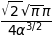

In [15]:
C=integrate(4 * π * r** 2 * exp(-α * r**2 )  * exp(-α * r**2), (r, 0, oo) )
C.args[0][0]

Exercise 1.20 hint とにかく計算を楽にするのみ。

In [16]:
θ = symbols('θ')

In [17]:
c = Matrix([
    [cos(θ)],[sin(θ)]
])

In [18]:
O11, O12, O22 = symbols('O11 O12 O22')

In [19]:
O = Matrix([
    [O11, O12], [O12, O22]
])

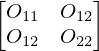

In [20]:
O

In [21]:
c

⎡cos(θ)⎤
⎢      ⎥
⎣sin(θ)⎦

In [22]:
c.T

[cos(θ)  sin(θ)]

In [23]:
c.T * O * c

[(O₁₁⋅cos(θ) + O₁₂⋅sin(θ))⋅cos(θ) + (O₁₂⋅cos(θ) + O₂₂⋅sin(θ))⋅sin(θ)]

In [24]:
diff(c.T*O*c, θ)

[(-O₁₁⋅sin(θ) + O₁₂⋅cos(θ))⋅cos(θ) - (O₁₁⋅cos(θ) + O₁₂⋅sin(θ))⋅sin(θ) + (-O₁₂⋅
sin(θ) + O₂₂⋅cos(θ))⋅sin(θ) + (O₁₂⋅cos(θ) + O₂₂⋅sin(θ))⋅cos(θ)]

In [25]:
diff(c.T*O*c, θ)

[(-O₁₁⋅sin(θ) + O₁₂⋅cos(θ))⋅cos(θ) - (O₁₁⋅cos(θ) + O₁₂⋅sin(θ))⋅sin(θ) + (-O₁₂⋅
sin(θ) + O₂₂⋅cos(θ))⋅sin(θ) + (O₁₂⋅cos(θ) + O₂₂⋅sin(θ))⋅cos(θ)]

In [26]:
simplify(diff(c.T*O*c, θ))

[-O₁₁⋅sin(2⋅θ) + 2⋅O₁₂⋅cos(2⋅θ) + O₂₂⋅sin(2⋅θ)]

Exercise 1.22 Hamiltonian行列を作成し、永年方程式を作り、対角化する。

In [27]:
π = symbols('π')

In [28]:
F = symbols('F')

In [29]:
r = symbols ('r')

In [30]:
ϕ = symbols ('ϕ')

In [31]:
ψ_1s=1/sqrt(π) * exp(-r)
ψ_1s

In [32]:
ψ_2p = 1/sqrt(32 * π) * r * exp(-r/2) * cos(θ)
ψ_2p

まず、$$   \langle 1s |  H_0 + F\cos(\theta) | 1s \rangle  = -\frac{1}{2}$$ 対称性より外場部分は0となる

実際、$$   \langle 1s |   F\cos(\theta) | 1s \rangle  $$を計算すると

In [33]:
integrate( ψ_1s * F * r * cos(θ) * ψ_1s * r**2 * sin(θ), (r,0,oo) , (θ,0,π), (ϕ, 0, 2 * π))

次に$$   \langle 2p |  H_0 + F\cos(\theta) | 2p  \rangle  = -\frac{1}{8}$$ 同じく対称性より外場部分は0となる。実際

In [34]:
simplify(integrate( ψ_2p * F * r * cos(θ) * ψ_2p * r**2 * sin(θ), (r,0,oo) , (θ,0,π), (ϕ, 0, 2 * π)) )

最後に$$   \langle 1s |  H_0 + F\cos(\theta) | 2p  \rangle $$を計算する

In [35]:
simplify(integrate( ψ_1s * F * r * cos(θ) * ψ_2p * r**2 * sin(θ), (r,0,oo) , (θ,0,π), (ϕ, 0, 2 * π)) )

$$-cos^3(\pi) + 1 = 2$$だから

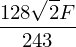

In [38]:
128 * sqrt(2) / 243 * F

となる。